In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway, kruskal
warnings.filterwarnings("ignore")
%matplotlib inline

In [151]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small,42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large,130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large,28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium,158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small,100000.0


In [140]:
data_df['EdLevel'].value_counts()

Master           3297
Bachelor         3210
Doctoral(PhD)     780
Name: EdLevel, dtype: int64

In [141]:
data_df['DevType'].value_counts()

DE/DA/BA    3938
DS/MLE      3349
Name: DevType, dtype: int64

### Salary Distribution by Education level for All Age groups

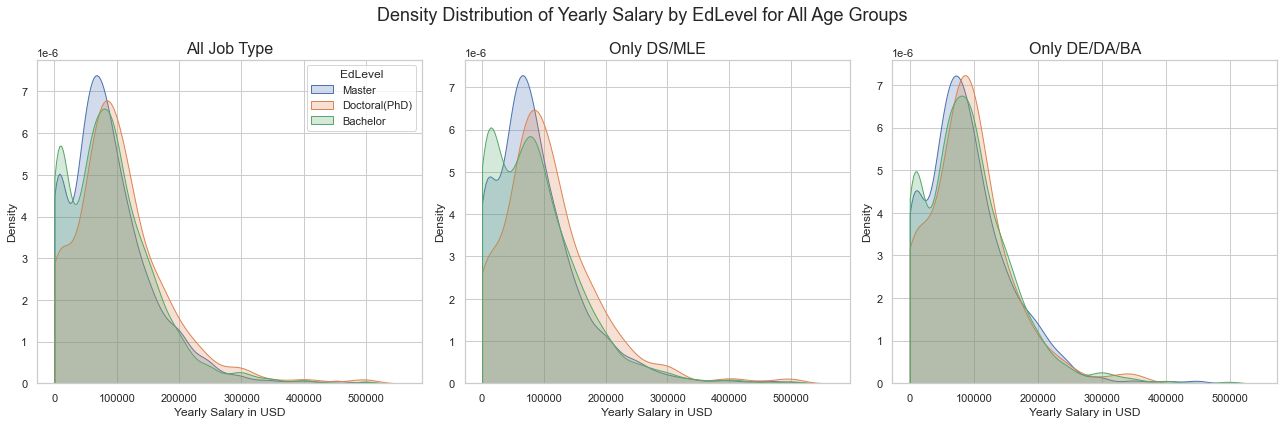

In [146]:
# Set a professional color palette
sns.set_palette("colorblind")
sns.set_theme(style="whitegrid") 
fig.set_facecolor('white')  # Set the background color of the figure
# Custom font settings (adjust font family and size as needed)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# First subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') ], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[0])
axes[0].set_xlabel('Yearly Salary in USD')
axes[0].set_ylabel('Density')
axes[0].set_title('All Job Type', fontsize=16)
axes[0].legend(title='EdLevel')


# Second subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[1])
axes[1].set_xlabel('Yearly Salary in USD')
axes[1].set_ylabel('Density')
axes[1].set_title('Only DS/MLE',fontsize=16)

# Third subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[2])
axes[2].set_xlabel('Yearly Salary in USD')
axes[2].set_ylabel('Density')
axes[2].set_title('Only DE/DA/BA',fontsize=16)

fig.suptitle('Density Distribution of Yearly Salary by EdLevel for All Age Groups', fontsize=18)
plt.tight_layout()
plt.show()

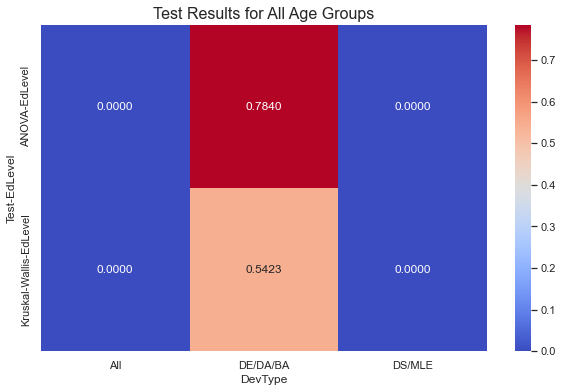

In [160]:
# Perform tests and store results
results = []

# Test 1
bs_ms_compensation = data_df[data_df['EdLevel'] == 'Master']['Salary_USD']
phd_compensation = data_df[data_df['EdLevel'] == 'Doctoral(PhD)']['Salary_USD']
other_compensation = data_df[data_df['EdLevel'] == 'Bachelor']['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'All', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'All', 'Kruskal-Wallis', p_value_kruskal))

# Test 2
bs_ms_compensation = data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']
phd_compensation = data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']
other_compensation = data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DS/MLE', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'DS/MLE', 'Kruskal-Wallis', p_value_kruskal))

# Test 3
bs_ms_compensation = data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']
phd_compensation = data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']
other_compensation = data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DE/DA/BA', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'DE/DA/BA', 'Kruskal-Wallis', p_value_kruskal))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['EdLevel', 'DevType', 'Test', 'p-value'])

# Pivot the DataFrame for better visualization
pivot_df = results_df.pivot_table(index=['Test', 'EdLevel'], columns='DevType', values='p-value', aggfunc='first')

# Display the pivot table using Seaborn heatmap
sns.set_palette("colorblind")
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Test Results for All Age Groups', fontsize=16)
plt.show()

### Salary Distribution by Education level for Age > 35 years old

In [162]:
data_df = data_df[data_df['Age'] == '>35 years old']

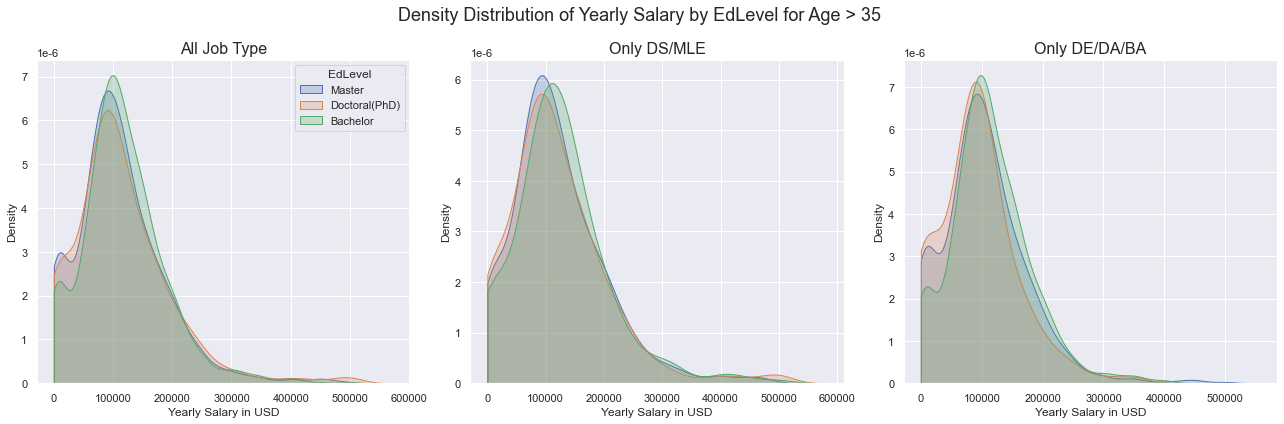

In [163]:
# Set a professional color palette
sns.set_palette("bright")
sns.set_theme(style="darkgrid") 
fig.set_facecolor('white')  # Set the background color of the figure
# Custom font settings (adjust font family and size as needed)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# First subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') ], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[0])
axes[0].set_xlabel('Yearly Salary in USD')
axes[0].set_ylabel('Density')
axes[0].set_title('All Job Type', fontsize=16)
axes[0].legend(title='EdLevel')


# Second subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[1])
axes[1].set_xlabel('Yearly Salary in USD')
axes[1].set_ylabel('Density')
axes[1].set_title('Only DS/MLE',fontsize=16)

# Third subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[2])
axes[2].set_xlabel('Yearly Salary in USD')
axes[2].set_ylabel('Density')
axes[2].set_title('Only DE/DA/BA',fontsize=16)

fig.suptitle('Density Distribution of Yearly Salary by EdLevel for Age > 35 ', fontsize=18)
plt.tight_layout()
plt.show()

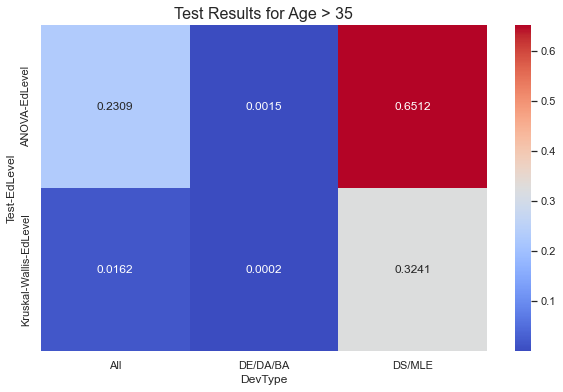

In [164]:
from scipy.stats import f_oneway, kruskal

# Perform tests and store results
results = []

# Test 1
bs_ms_compensation = data_df[data_df['EdLevel'] == 'Master']['Salary_USD']
phd_compensation = data_df[data_df['EdLevel'] == 'Doctoral(PhD)']['Salary_USD']
other_compensation = data_df[data_df['EdLevel'] == 'Bachelor']['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'All', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'All', 'Kruskal-Wallis', p_value_kruskal))

# Test 2
bs_ms_compensation = data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']
phd_compensation = data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']
other_compensation = data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')]['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DS/MLE', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'DS/MLE', 'Kruskal-Wallis', p_value_kruskal))

# Test 3
bs_ms_compensation = data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']
phd_compensation = data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']
other_compensation = data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')]['Salary_USD']

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)
h_statistic, p_value_kruskal = kruskal(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DE/DA/BA', 'ANOVA', p_value_anova))
results.append(('EdLevel', 'DE/DA/BA', 'Kruskal-Wallis', p_value_kruskal))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['EdLevel', 'DevType', 'Test', 'p-value'])

# Pivot the DataFrame for better visualization
pivot_df = results_df.pivot_table(index=['Test', 'EdLevel'], columns='DevType', values='p-value', aggfunc='first')

# Display the pivot table using Seaborn heatmap
sns.set_palette("colorblind")
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Test Results for Age > 35', fontsize=16)
plt.show()